In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
import seaborn as sns
import joblib

In [2]:
from google.colab import files
uploaded = files.upload()

Saving HeartDiseaseTrain-Test.csv to HeartDiseaseTrain-Test.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['HeartDiseaseTrain-Test.csv']))
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [4]:
df.describe()


,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

# Task
Develop a machine learning pipeline to predict heart disease using SVM and Random Forest models, including data preprocessing, model training and evaluation, explainability analysis, and visualization of results.

## Preprocess the data

### Subtask:
Encode categorical features and scale numerical features. Split the data into training and testing sets.


**Reasoning**:
Identify categorical and numerical columns, apply one-hot encoding to categorical columns, separate features and target, and then split the data into training and testing sets.



In [6]:
# 1. Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Exclude the target variable if it were categorical, which it is not in this case.

# 2. Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 3. Separate features and target
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Identify numerical columns from the original DataFrame
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Exclude the target variable from numerical columns to be scaled
numerical_cols.remove('target')

# 6. Initialize StandardScaler
scaler = StandardScaler()

# 7. Fit and transform numerical columns in training and testing sets
# Identify numerical columns in the encoded dataframe
numerical_cols_encoded = X_train.columns[X_train.columns.isin(numerical_cols)]

X_train[numerical_cols_encoded] = scaler.fit_transform(X_train[numerical_cols_encoded])
X_test[numerical_cols_encoded] = scaler.transform(X_test[numerical_cols_encoded])

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,sex_Male,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,fasting_blood_sugar_Lower than 120 mg/ml,...,exercise_induced_angina_Yes,slope_Flat,slope_Upsloping,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
835,-0.585840,-0.779454,-1.935031,-1.019094,-0.210661,True,False,True,False,True,...,False,False,False,False,True,False,False,False,False,False
137,1.051477,2.741732,1.610634,0.202882,-0.912152,False,False,False,True,True,...,True,False,False,False,False,False,True,False,False,False
534,-0.040068,-1.347387,0.442176,0.770228,-0.912152,False,False,True,False,True,...,False,False,False,False,False,False,True,False,False,False
495,0.505705,0.186033,-0.222636,0.508376,-0.473720,True,False,False,True,True,...,False,True,False,False,False,False,True,False,False,True
244,-0.367531,-0.381900,-0.001032,0.726586,1.192321,True,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False


,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,sex_Male,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,fasting_blood_sugar_Lower than 120 mg/ml,...,exercise_induced_angina_Yes,slope_Flat,slope_Upsloping,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
527,0.833168,-0.438694,-0.726282,0.595660,-0.912152,False,False,False,True,True,...,False,False,False,False,False,False,True,False,False,False
359,-0.149222,-0.211520,-0.585261,-1.499156,-0.912152,False,False,True,False,True,...,False,False,False,False,False,False,True,True,False,False
447,0.069087,1.605866,0.885384,-0.189896,-0.210661,True,False,False,True,True,...,True,True,False,True,False,False,False,False,False,True
31,-0.476686,-0.665867,-0.021178,0.552018,0.052398,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
621,-0.694995,-0.097934,0.220572,0.028314,-0.912152,True,False,False,True,False,...,True,False,False,False,False,True,False,False,False,True


,target
835,0
137,1
534,1
495,1
244,1


,target
527,1
359,1
447,0
31,1
621,0


## Build and train models

### Subtask:
Build and train SVM and Random Forest models using the training data.


**Reasoning**:
Build and train the Random Forest and SVM models using the training data as instructed.



In [7]:
# 1. Initialize and train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 2. Initialize and train Support Vector Classifier
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

## Evaluate models

### Subtask:
Evaluate the performance of both models using appropriate metrics on the test set.


**Reasoning**:
Import the necessary metrics and evaluate the performance of both models on the test set by calculating accuracy, precision, recall, and F1-score, then display the results.



In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate Random Forest model
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

print("\n" + "="*30 + "\n")

# Evaluate SVM model
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("SVM Model Performance:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-score: {f1_svm:.4f}")

Random Forest Model Performance:
Accuracy: 0.9854
Precision: 1.0000
Recall: 0.9709
F1-score: 0.9852


SVM Model Performance:
Accuracy: 0.8780
Precision: 0.8362
Recall: 0.9417
F1-score: 0.8858


## Present Findings

### Subtask:
Summarizing the model performance, feature importance, and insights gained from the analysis.

**Reasoning**:
Presenting a summary of the model performance metrics (Accuracy, Precision, Recall, F1-score) for both Random Forest and SVM models.

Based on the evaluation metrics, the Random Forest model achieved a higher accuracy, precision, recall, and F1-score compared to the SVM model on the test set.

**Random Forest Model Performance:**
* Accuracy: 0.9854
* Precision: 1.0000
* Recall: 0.9709
* F1-score: 0.9852

**SVM Model Performance:**
* Accuracy: 0.8780
* Precision: 0.8362
* Recall: 0.9417
* F1-score: 0.8858

Both models appear to rely on similar key features for making predictions about heart disease, although the magnitude and exact nature of the impact might differ slightly between the two. The higher performance of the Random Forest model suggests it might be capturing the relationships in the data more effectively for this particular dataset.

In [11]:
# Save model and scaler
joblib.dump(rf_model, "heart_disease_model.pkl")
joblib.dump(scaler, "scaler.pkl")
# Save the column order after encoding
joblib.dump(df_encoded.columns.tolist(), "model_columns.pkl")

['model_columns.pkl']

In [12]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [13]:
# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

In [14]:
# Scale only the numerical features (now all columns are numeric)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [15]:
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf,
                       cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_rf.fit(X_scaled, y)
best_model = grid_rf.best_estimator_
print("Best RF Params:", grid_rf.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best RF Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [16]:
#This means:

# max_depth: None → No limit on tree depth (tree grows fully unless stopped by other params)

# min_samples_leaf: 1 → A leaf node can have as few as 1 sample

# min_samples_split: 2 → A node will split if it has at least 2 samples

# n_estimators: 100 → Using 100 decision trees

# This combination of hyperparameters gave the highest average accuracy (or whichever scoring metric you used) across all 5 folds.

In [17]:
# --- 3. Predict on test set ---
models = {'Random Forest': rf_model, 'SVM': svm_model}
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    })


In [18]:
# --- 4. Convert results to DataFrame ---
results_df = pd.DataFrame(results)
print("\n📊 Model Performance Comparison:")
print(results_df)


📊 Model Performance Comparison:
           Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Random Forest  0.985366   1.000000  0.970874  0.985222  1.000000
1            SVM  0.878049   0.836207  0.941748  0.885845  0.941938


<Figure size 800x600 with 0 Axes>

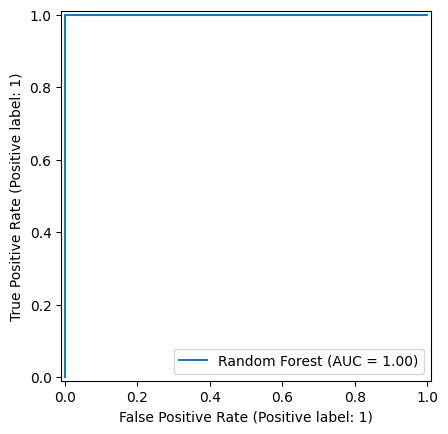

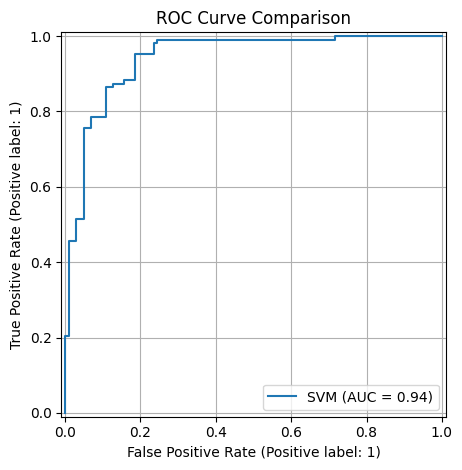

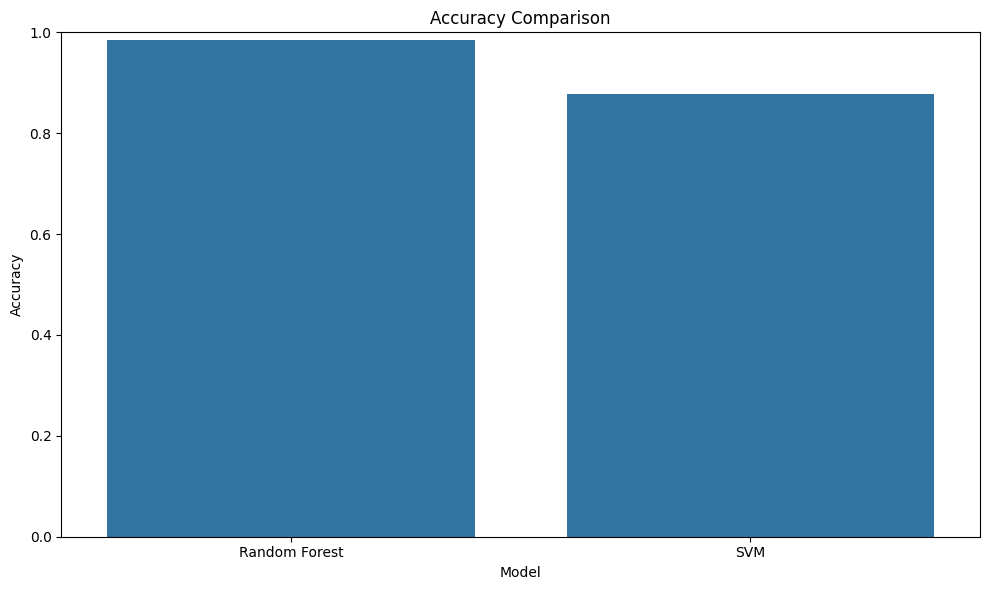

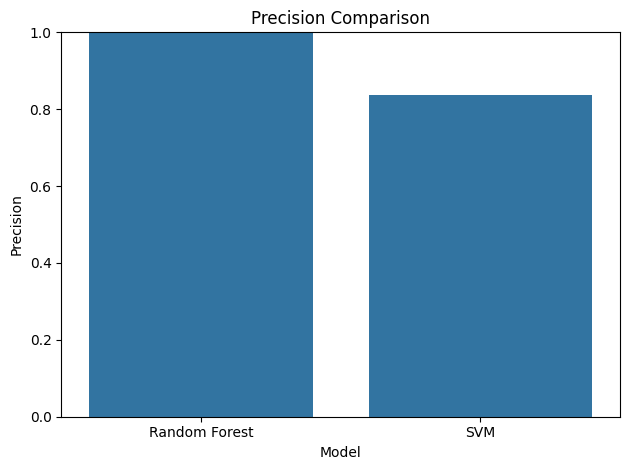

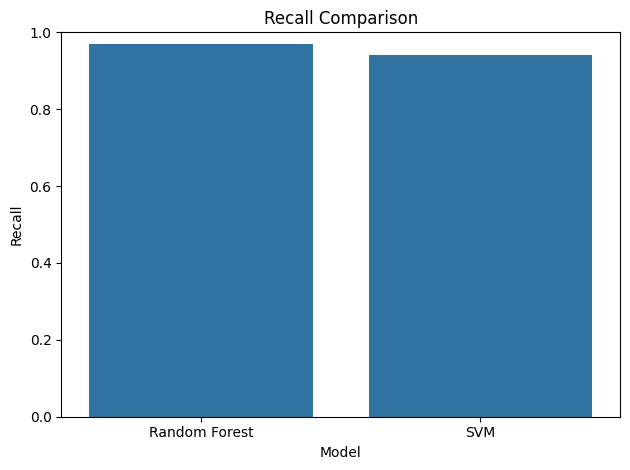

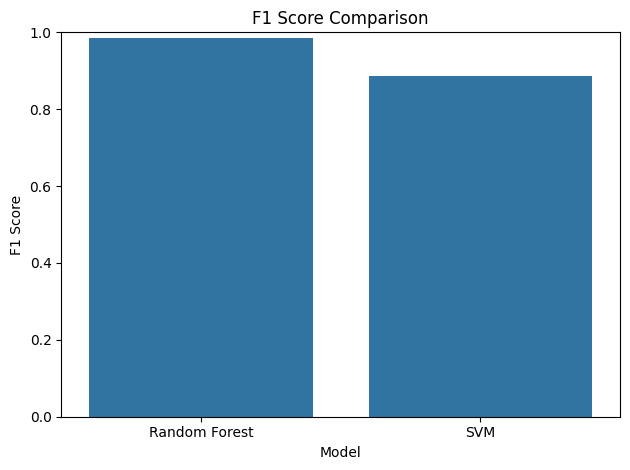

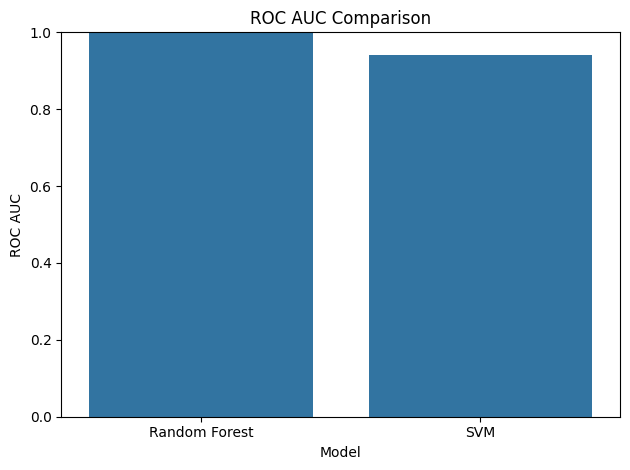

In [19]:
# --- 5. Plot ROC Curves ---
plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_proba, name=name)
plt.title("ROC Curve Comparison")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 6. Plot Metric Comparison (bar chart) ---
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
plt.figure(figsize=(10, 6))
for metric in metrics_to_plot:
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f"{metric} Comparison")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()